### Counterfactual explanation on ImageNet

This is an example of `CounterfactualExplainer` on ImageNet. `CounterfactualExplainer` is an optimization based method for generating counterfactual examples, supporting classification tasks only. If using this explainer, please cite the paper "Counterfactual Explanations without Opening the Black Box: Automated Decisions and the GDPR, Sandra Wachter, Brent Mittelstadt, Chris Russell, https://arxiv.org/abs/1711.00399".

In [1]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
import json
import torch
from torchvision import models, transforms
from PIL import Image as PilImage

from omnixai.data.image import Image
from omnixai.explainers.vision import CounterfactualExplainer

We recommend using `Image` to represent a batch of images. `Image` can be constructed from a numpy array or a Pillow image. In this example, we load one image for testing purpose.

In [3]:
# Load a test image
img = Image(PilImage.open('../data/images/camera.jpg').convert('RGB'))
# Load class names corresponding to the labels
with open('../data/images/imagenet_class_index.json', 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
print(img.shape)

(1, 224, 224, 3)


To initialize `CounterfactualExplainer`, we need to set the following parameters:
  
  - `model`: The ML model to explain, e.g., `torch.nn.Module` or `tf.keras.Model`.
  - `preprocess_function`: The preprocessing function that converts the raw data (a `image` instance) into the inputs of `model`.
  - "optimization parameters": e.g., `binary_search_steps`, `num_iterations`. Please refer to the docs for more details.
  
The model considered here is a ResNet model pretrained on ImageNet. The preprocessing function takes an `Image` instance as its input and outputs the processed features that the ML model consumes. In this example, the `Image` object is converted into a torch tensor via the defined `transform`.

In [4]:
# A ResNet model to explain
model = models.resnet50(pretrained=True)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# The preprocessing function
preprocess = lambda ims: torch.stack([transform(im.to_pil()) for im in ims])

In [5]:
# Initialize a `CounterfactualExplainer`
explainer = CounterfactualExplainer(
    model=model,
    preprocess_function=preprocess,
    binary_search_steps=2,
    num_iterations=100
)

We can simply call `explainer.explain` to generate counterfactual examples for this classification task. `ipython_plot` plots the generated explanations in IPython. Parameter `index` indicates which instance to plot, e.g., `index = 0` means plotting the first instance in `img`.

Binary step: 2 |███████████████████████████████████████-| 99.0% 

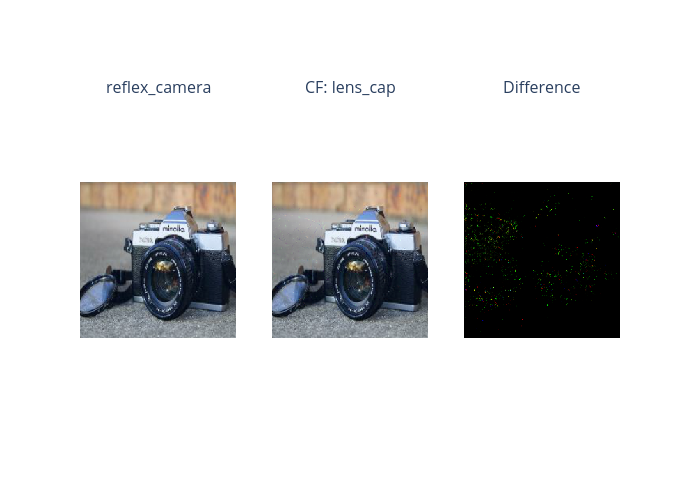

In [6]:
# Generate explanations
explanations = explainer.explain(img)
explanations.ipython_plot(index=0, class_names=idx2label)